# Occupancy Detection

In [14]:
from __future__ import division
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

###### functions

In [3]:
def autolabel(rects):
    # attach some text labels    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

###### Load Data

In [4]:
train_data = pd.read_csv("occupancy_data/datatraining.txt")
test_data = pd.read_csv("occupancy_data/datatest.txt")
test_data2 = pd.read_csv("occupancy_data/datatest2.txt")

data = pd.concat([train_data, test_data, test_data2])

print data.info()
print data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20560 entries, 1 to 9752
Data columns (total 7 columns):
date             20560 non-null object
Temperature      20560 non-null float64
Humidity         20560 non-null float64
Light            20560 non-null float64
CO2              20560 non-null float64
HumidityRatio    20560 non-null float64
Occupancy        20560 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ MB
None
                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  

###### Manibulating Data

In [5]:
#data
target = data['Occupancy']
tmp = data.drop(['date', 'Occupancy', 'HumidityRatio'], axis=1)

class_1 = [d for d, t in zip(np.asarray(tmp), target) if t == 1]
class_2 = [d for d, t in zip(np.asarray(tmp), target) if t == 0]

# print np.shape(class_1)
# print np.shape(class_2)

class_1_means = np.mean(class_1, axis=0)
class_2_means = np.mean(class_2, axis=0)

class_1_std = np.std(class_1, axis=0)
class_2_std = np.std(class_2, axis=0)

# print class_1_means
# print class_2_means

# print class_1_std
# print class_2_std

##### Basic Bar Chart

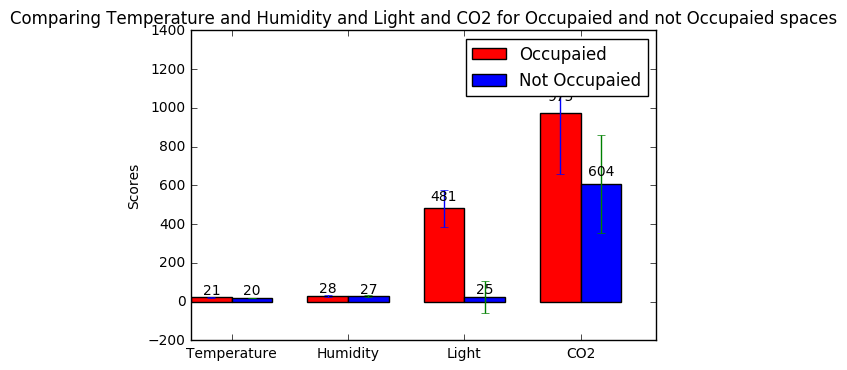

In [6]:
N = 4
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(ind, class_1_means, width, color='r', yerr=class_1_std)

rects2 = ax.bar(ind+width, class_2_means, width, color='b', yerr=class_2_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Comparing Temperature and Humidity and Light and CO2 for Occupaied and not Occupaied spaces')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Temperature', 'Humidity', 'Light', 'CO2'))

ax.legend((rects1[0], rects2[0]), ('Occupaied', 'Not Occupaied'))

autolabel(rects1)
autolabel(rects2)

plt.show()

###### Stacked Bar Chart

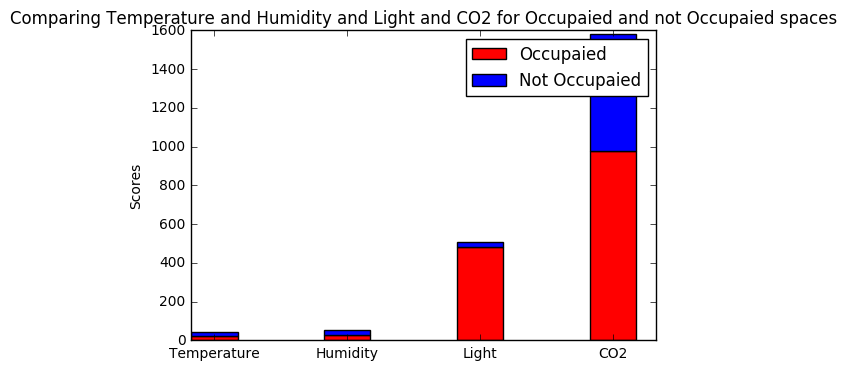

In [7]:
N = 4
ind = np.arange(N)
width = 0.35


fig, ax = plt.subplots()

rects1 = ax.bar(ind, class_1_means, width, color='r')

rects2 = ax.bar(ind, class_2_means, width, color='b', bottom=class_1_means)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Comparing Temperature and Humidity and Light and CO2 for Occupaied and not Occupaied spaces')

plt.xticks(ind + width/2., ('Temperature', 'Humidity', 'Light', 'CO2'))

ax.legend((rects1[0], rects2[0]), ('Occupaied', 'Not Occupaied'))

plt.show()

###### Scatter Matrix

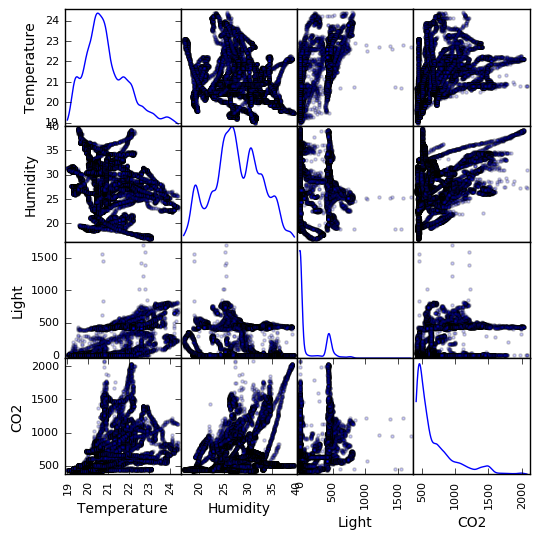

In [17]:
scatter_matrix(tmp, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()